In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("Smartphones_cleaned_dataset.csv")
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [12]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [14]:
df.describe().round()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.0,879.0,974.0,938.0,969.0,980.0,769.0,980.0,980.0,980.0,980.0,980.0,976.0,980.0,975.0,980.0,500.0,980.0,980.0
mean,32521.0,78.0,8.0,2.0,4818.0,1.0,46.0,7.0,141.0,7.0,92.0,3.0,1.0,50.0,17.0,1.0,736.0,1076.0,2215.0
std,39532.0,7.0,1.0,0.0,1010.0,0.0,34.0,3.0,107.0,0.0,29.0,1.0,0.0,33.0,11.0,0.0,367.0,290.0,516.0
min,3499.0,60.0,4.0,1.0,1821.0,0.0,10.0,1.0,8.0,4.0,60.0,1.0,1.0,2.0,0.0,0.0,32.0,480.0,480.0
25%,12999.0,74.0,8.0,2.0,4500.0,1.0,18.0,4.0,64.0,6.0,60.0,2.0,1.0,24.0,8.0,0.0,512.0,1080.0,1612.0
50%,19994.0,80.0,8.0,2.0,5000.0,1.0,33.0,6.0,128.0,7.0,90.0,3.0,1.0,50.0,16.0,1.0,1024.0,1080.0,2400.0
75%,35492.0,84.0,8.0,3.0,5000.0,1.0,66.0,8.0,128.0,7.0,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,1080.0,2408.0
max,650000.0,89.0,8.0,3.0,22000.0,1.0,240.0,18.0,1024.0,8.0,240.0,4.0,2.0,200.0,60.0,1.0,2048.0,2460.0,3840.0


In [15]:
df.isna().sum().sort_values()

brand_name                     0
extended_memory_available      0
primary_camera_rear            0
num_rear_cameras               0
refresh_rate                   0
screen_size                    0
internal_memory                0
ram_capacity                   0
resolution_width               0
fast_charging_available        0
resolution_height              0
has_ir_blaster                 0
has_nfc                        0
has_5g                         0
price                          0
model                          0
num_front_cameras              4
primary_camera_front           5
num_cores                      6
battery_capacity              11
os                            14
processor_brand               20
processor_speed               42
rating                       101
fast_charging                211
extended_upto                480
dtype: int64

## Cleaning and Handling Missing Values

In [16]:
# Drop extended_upto column
df.drop("extended_upto", axis=1, inplace=True)

In [17]:
# Filling missing values with mode
df['fast_charging'].fillna(df['fast_charging'].mode()[0], inplace = True)
df['processor_brand'].fillna(df['processor_brand'].mode()[0], inplace = True)


# Fill num_front_cameras with 1
df['num_front_cameras'].fillna(1, inplace = True)

In [129]:
# Filling missing values with median
df['rating'].fillna(df['rating'].median(), inplace = True)


# Fill processor_speed with median per processor_brand
df['processor_speed'] = df.groupby('processor_brand')['processor_speed'].transform(lambda x: x.fillna(x.median()))


#Fill battery_capacity with median per brand_name
df['battery_capacity'] = df.groupby('brand_name')['battery_capacity'].transform(lambda x: x.fillna(x.median()))


# Fill primary_camera_front with median per brand
df['primary_camera_front'] = df.groupby('brand_name')['primary_camera_front'].transform(lambda x: x.fillna(x.median()))

In [130]:
# Fill os with mode per brand_name
df['os'] = df.groupby('brand_name')['os'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


# Fill num_cores with mode per processor_brand
df['num_cores'] = df.groupby('processor_brand')['num_cores'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 8))

In [131]:
df.isna().sum()

brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_width             0
resolution_height            0
dtype: int64

In [132]:
df.dtypes

brand_name                    object
model                         object
price                          int64
rating                       float64
has_5g                          bool
has_nfc                         bool
has_ir_blaster                  bool
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available        int64
fast_charging                float64
ram_capacity                   int64
internal_memory                int64
screen_size                  float64
refresh_rate                   int64
num_rear_cameras               int64
num_front_cameras            float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available      int64
resolution_width               int64
resolution_height              int64
dtype: object

## Converting Datatypes

In [136]:
# Convert numerical count columns to int
df['num_cores'] = df['num_cores'].astype(int)
df['num_front_cameras'] = df['num_front_cameras'].astype(int)

In [137]:
# Convert binary columns to boolean

binary_cols = [ 'fast_charging_available', 'fast_charging']
for col in binary_cols:
    df[col] = df[col].astype(bool) 

In [138]:
# Convert brand and categorical columns to 'category'

cat_cols = ['brand_name', 'processor_brand', 'os']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [139]:
df.dtypes

brand_name                   category
model                          object
price                           int64
rating                        float64
has_5g                           bool
has_nfc                          bool
has_ir_blaster                   bool
processor_brand              category
num_cores                       int32
processor_speed               float64
battery_capacity              float64
fast_charging_available          bool
fast_charging                    bool
ram_capacity                    int64
internal_memory                 int64
screen_size                   float64
refresh_rate                    int64
num_rear_cameras                int64
num_front_cameras               int32
os                           category
primary_camera_rear           float64
primary_camera_front          float64
extended_memory_available       int64
resolution_width                int64
resolution_height               int64
dtype: object

# Brand Distribution

In [149]:
df['brand_name'].value_counts()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
honor         13
nokia         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
redmi          3
gionee         3
letv           3
lg             3
micromax       3
oukitel        3
ikall          3
royole         2
lyf            2
lenovo         2
doogee         2
zte            2
leitz          1
leeco          1
duoqin         1
sharp          1
cola           1
tcl            1
cat            1
tesla          1
vertu          1
blu            1
blackview      1
Name: count, dtype: int64

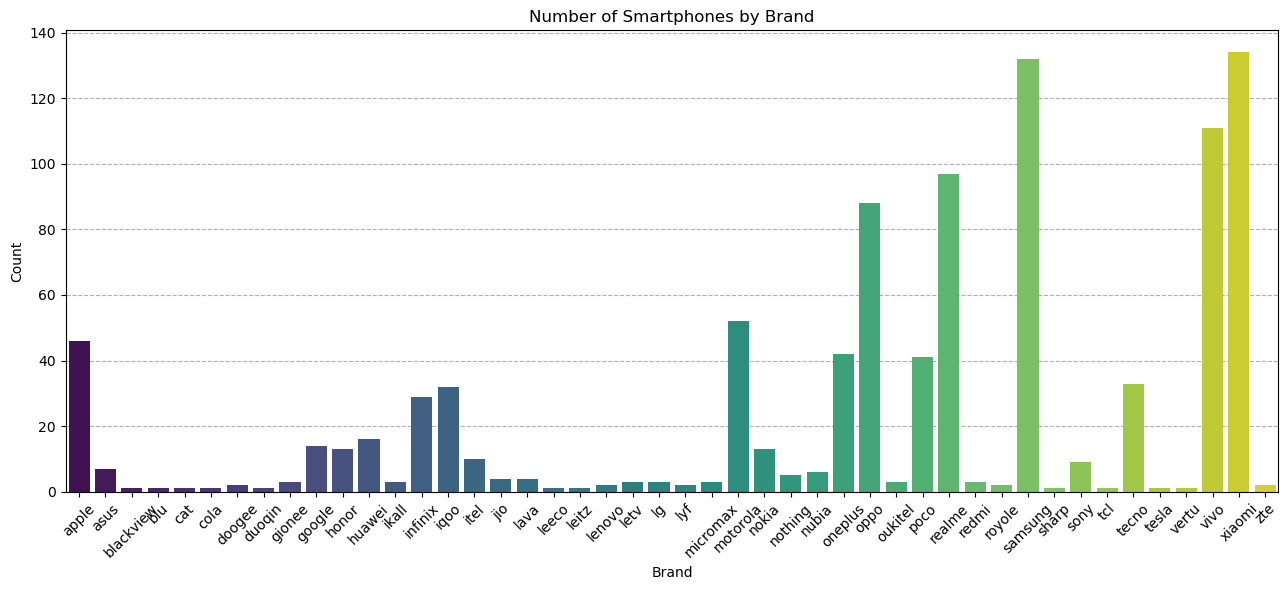

In [150]:
# Bar Chart to Visualize Brand Distribution

plt.figure(figsize=(13,6))
brand_counts = df['brand_name'].value_counts()
sns.barplot(x = brand_counts.index, y =brand_counts.values, palette = 'viridis')

#Adding Grid lines and that to in background which will not overlap visual
plt.grid(True, axis = 'y', linestyle = "--", alpha = 1.0)
plt.gca().set_axisbelow(True)

plt.title("Number of Smartphones by Brand")
plt.xlabel("Brand")
plt.ylabel("Count")

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### 1. Top Brands Dominate
 Brands like Xiaomi, Samsung and Vivo have the highest number of smartphone models. Indicating their strong market presence.
#### 2. Dataset Skewed Towards Budget Brands
 The Distribution suggests the dataset leans toward brands known for budget to mid-range phones rather than premium flagship-focused brands like Apple.

# Price Distribution

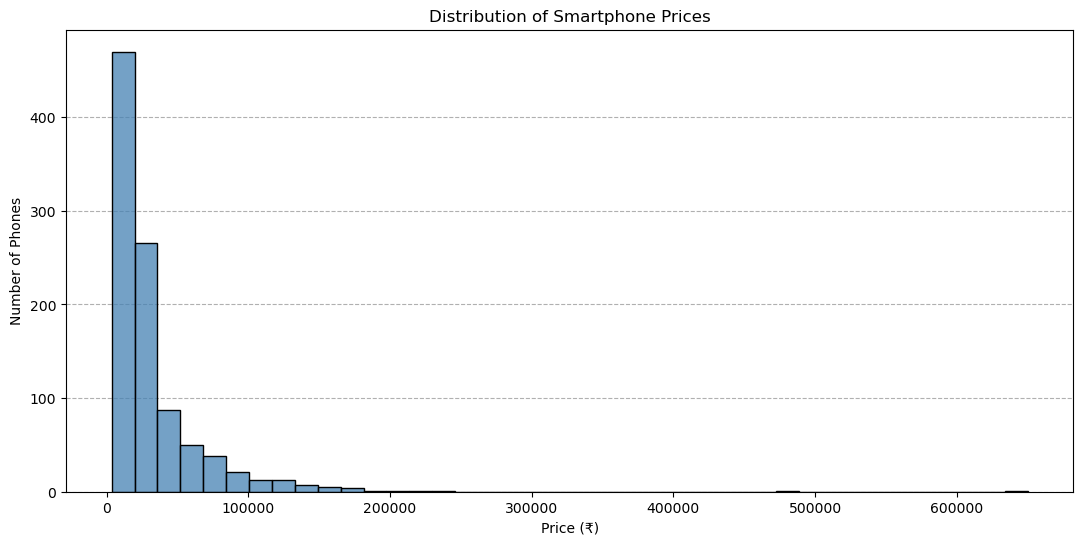

In [151]:
# Histogram to see the frequency

plt.figure(figsize=(13,6))
sns.histplot(df['price'], bins = 40, kde=False, color = 'steelblue')
plt.title("Distribution of Smartphone Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Phones")
plt.grid(True, axis = 'y', linestyle = "--", alpha = 1.0)
plt.gca().set_axisbelow(True)
plt.show()

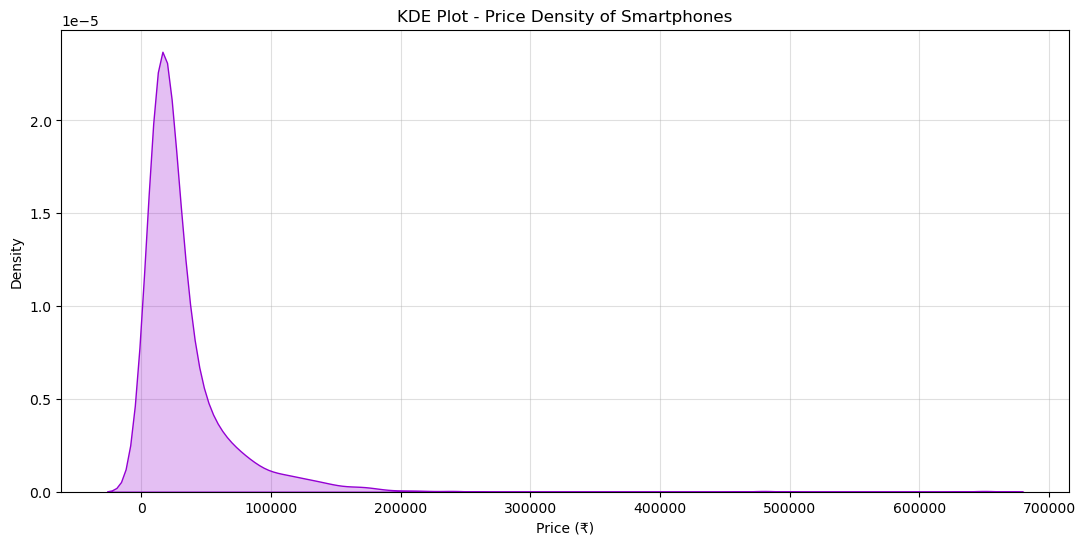

In [152]:
# KDE Plot to see the price density
plt.figure(figsize=(13,6))
sns.kdeplot(df['price'], shade = True, color = 'darkviolet')
plt.title("KDE Plot - Price Density of Smartphones")
plt.xlabel('Price (₹)')
plt.ylabel("Density")
plt.grid(True, alpha = 0.4)
plt.gca().set_axisbelow(True)
plt.show()

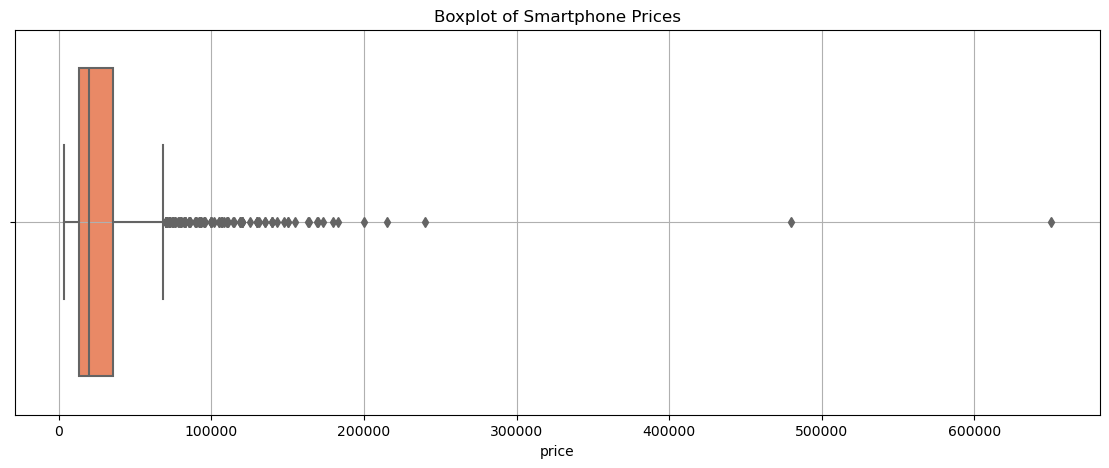

In [145]:
# Boxplot to detect outliers
plt.figure(figsize=(14,5))
sns.boxplot(x = 'price', data=df, color='coral')
plt.title("Boxplot of Smartphone Prices")
plt.grid(True)
plt.show()

##### 1. Majority of Smartphones fall between ₹10,000 and ₹30,000, highlighting strong market focus on the budget and mid-range segments.
##### 2. Prices are right-skewed, with a few models crossing ₹70,000 likely premium flagships from top brands.
##### 3. Outliers exist but are valid, reflecting real high-end offerings in the market.
##### 4. Mid-range pricing dominates, suggesting affordability is a key driver in consumer purchasing behavior.

# Feauture VS Price Analysis

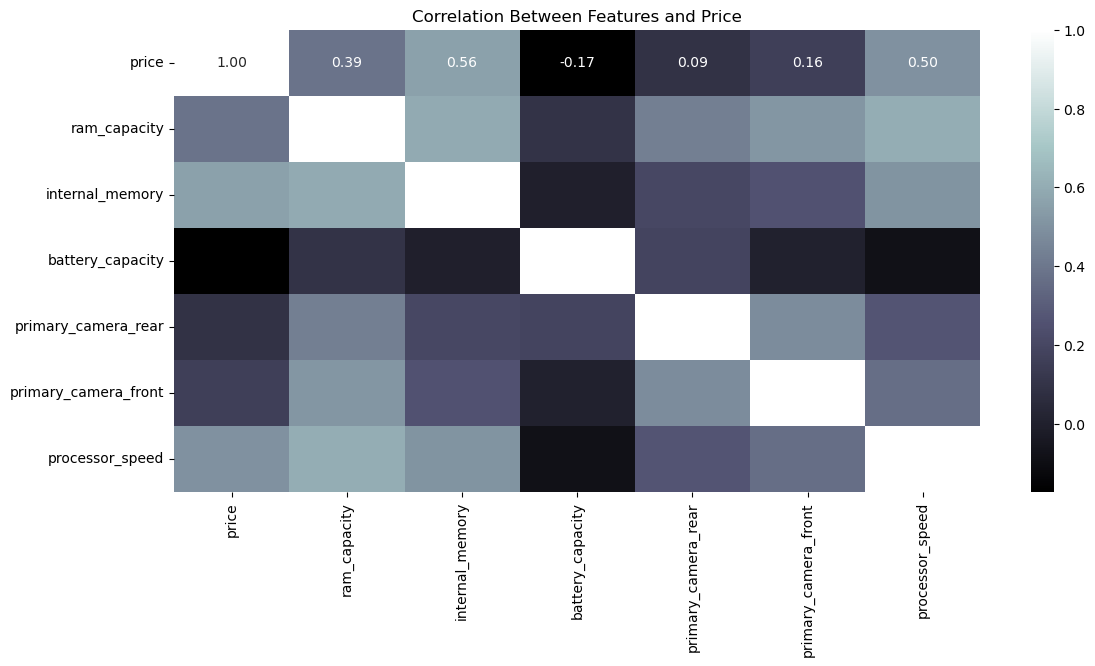

In [146]:
#Correlation Heatmap (numerical Features VS Price)
numerical_cols = ['price', 'ram_capacity', 'internal_memory', 'battery_capacity','primary_camera_rear', 'primary_camera_front', 'processor_speed']

plt.figure(figsize=(13,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='bone', fmt = '.2f')
plt.title("Correlation Between Features and Price")
plt.show()

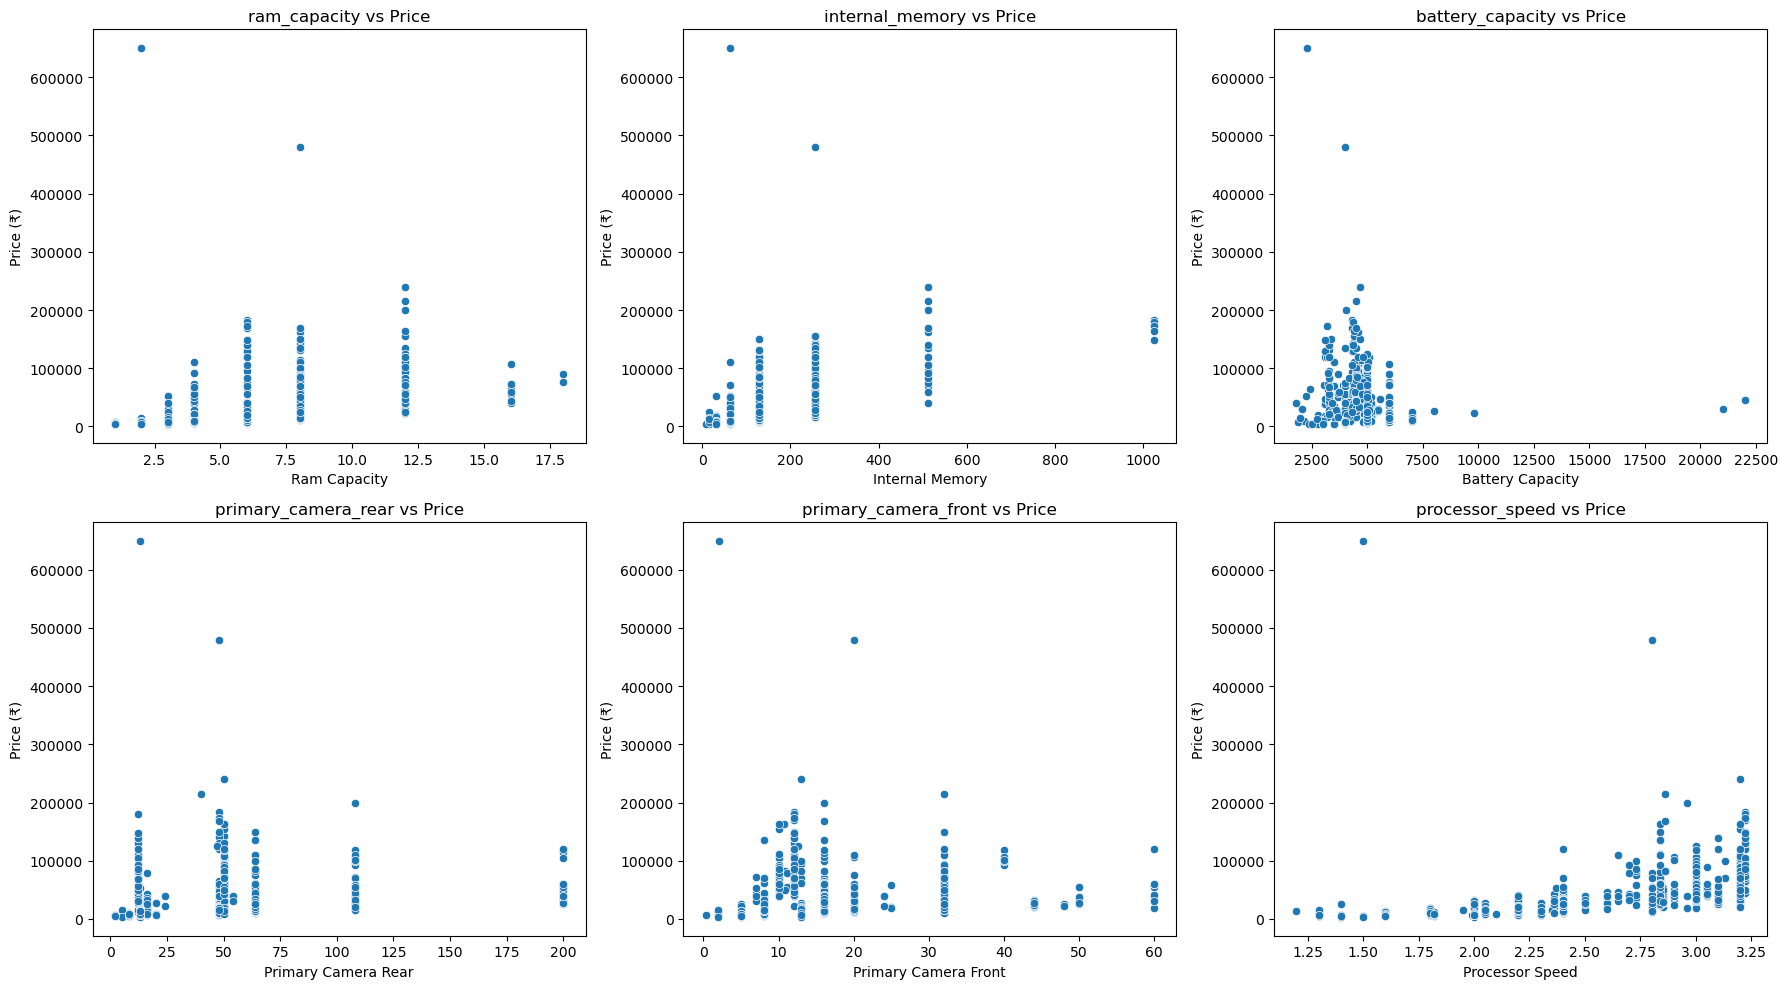

In [147]:
features = ['ram_capacity', 'internal_memory', 'battery_capacity', 
            'primary_camera_rear', 'primary_camera_front', 'processor_speed']

# Set up 2 rows × 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the grid for easy looping

# Loop through each feature to create scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['price'], ax=axes[i])
    axes[i].set_title(f'{feature} vs Price')
    axes[i].set_xlabel(feature.replace('_', ' ').title())
    axes[i].set_ylabel('Price (₹)')

# Adjust layout for clean spacing
plt.tight_layout()
plt.show()

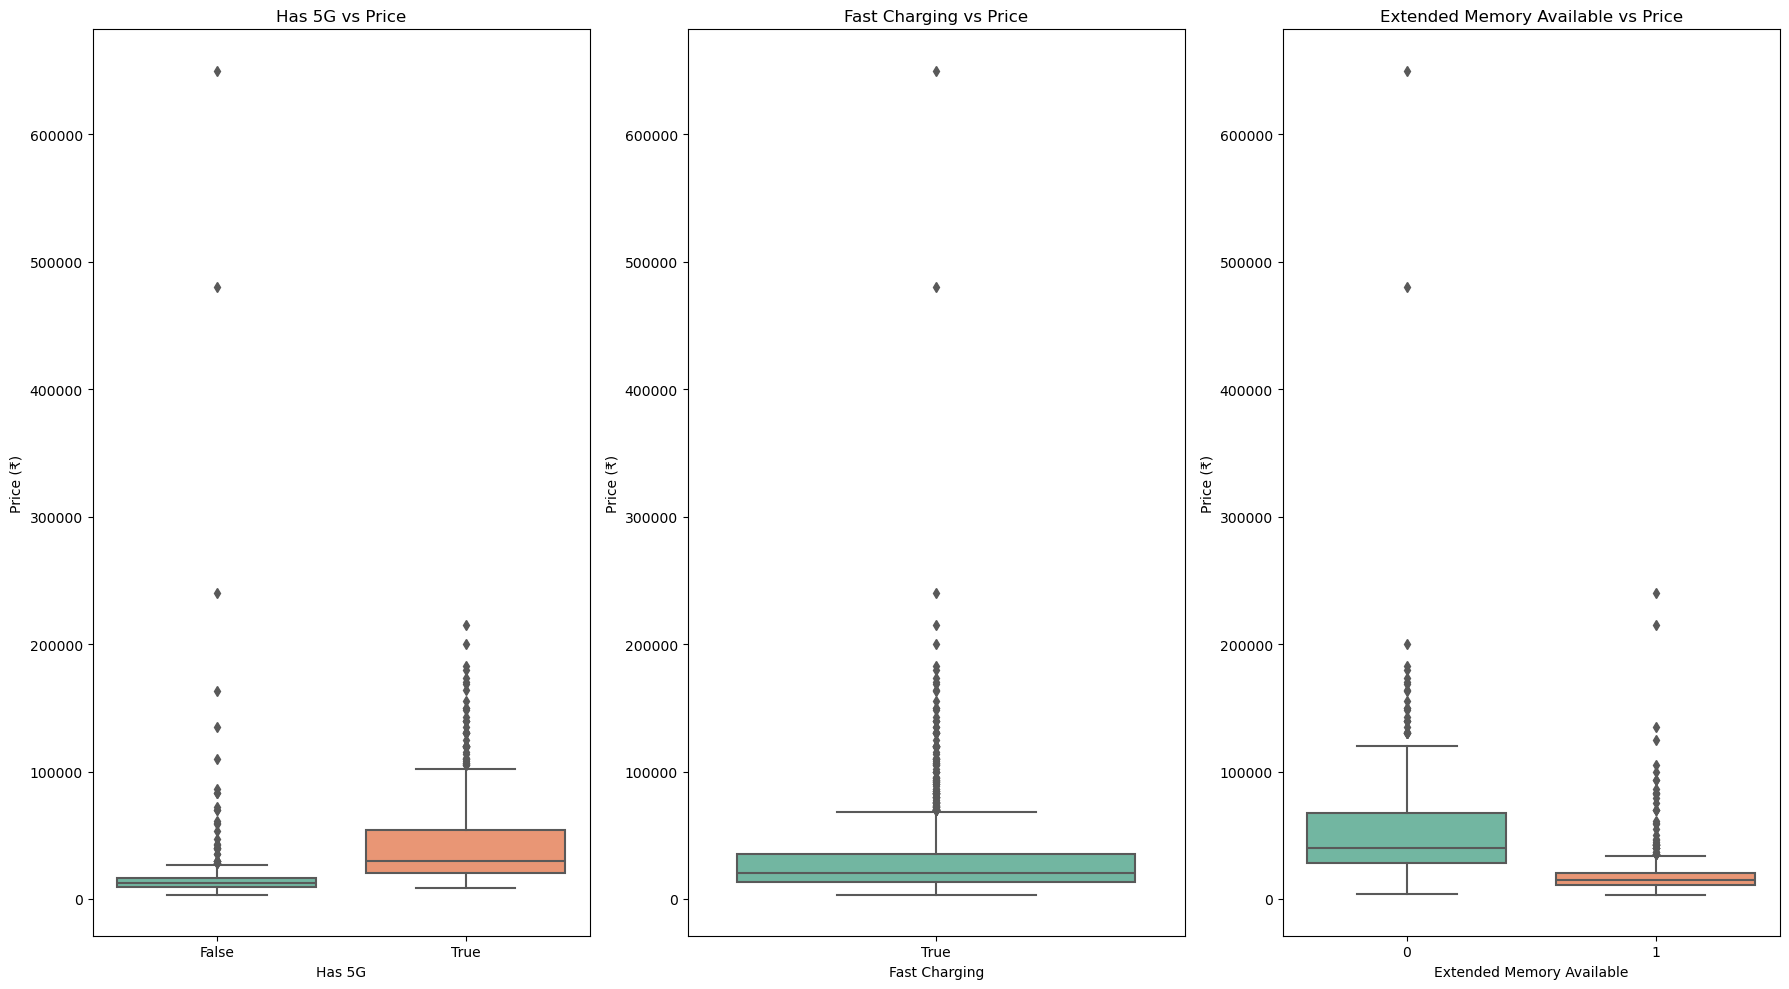

In [148]:
features = ['has_5g', 'fast_charging', 'extended_memory_available']
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(18, 10))

for i, feature in enumerate(features):
    sns.boxplot(x=feature, y='price', data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Price')
    axes[i].set_xlabel(feature.replace('_', ' ').title())
    axes[i].set_ylabel('Price (₹)')

plt.tight_layout()
plt.show()

#### 1. RAM and Internal Memory
Smartphones with higher RAM and Internal Storage tend to have significantly higher prices, showing these are key cost drivers.
#### 2. Processor Speed
Faster processors generally align with premium pricing, indicating performance-focused phones come at a cost.
#### 3. Camera Specifications
Rear and Front camera megapixels show a mild influence on price, suggesting camera isn't the only factor in pricing.
#### 4. Batter Capacity
No Strong correlation - high battery doesn't always mean high price.
##### 5. 5G and Fast Charging 
Devices with 5G and Fast Charging support have noticeably higher median prices, showing these features push phones into higher price brackets.
#### 6. Expandable Storage
Phones without expandable storage are often priced higher-likelly due to larger built-in memory.

#

# INSIGHTS

### 1. Market Focus on Budget and Mid-Range Phones
#### Most smartphones are priced between ₹10,000 - ₹30,000, showing that brands are targeting cost-conscious consumers who prioritize value over luxury.
### 2. Brands Compete Aggressively on Variety, Not Price Alone
#### Xiaomi, Samsung, and Vivo lead with the widest range of offerings indicating that product diversity is a key competitive strategy, especially in the mid-range segment.
### 3. RAM and Internal Storage Are Strongest Price Drivers
#### Devices with higher RAM and internal memory command noticeably higher prices. These specs are core to performance and heavily influence consumer decisions.
### 4. Premium Features Like 5G and Fast Charging Push Prices Higher
#### Phones offering 5G and fast charging show a clear upward trend in pricing, positioning them as modern, future-ready offerings in the market.
### 5. Battery Size and Camera Megapixels Show Limited Price Impact
#### Despite marketing focus, battery capacity camera specs don't significantly shift price. This suggests pricing depends more on performance specs and premium features than just raw hardware numbers.

#

# RECOMMENDATIONS

### 1. Target the ₹15K-₹25K Sweet Spot
#### This range aligns with both feature rich models and consumer affordability, maximizing reach and profitability.
### 2. Prioritize 6GB+ RAM and 128GB Storage Configurations
#### These specs deliver high user satisfaction and justify a slightly higher price tag while staying within mid-range appeal.
### 3. Ensure Fast Charging and 5G Availability in New Models 
#### These two features significantly enhance perceived value and should be standard in future product lines, even for mid-tier phones.
### 4. Limit Over-Investment in Battery and Camera Megapixels
#### Beyond a certain point, increases in these specs don't influence pricing - focus more on processor performance and software experience instead.